# Lab 4.06 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 6 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/MuziekWijn.csv')
df.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Give the names of both columns. What is wrong?

In [13]:
df  = df.rename(columns={" Wijn": "Wijn"})

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

1. Set up the correct crosstab. 

In [15]:
observed = pd.crosstab(df.Muziek, df.Wijn)

2. Determine the marginal totals.

In [24]:
pd.crosstab(df.Muziek, df.Wijn, margins=True)

Wijn,Andere,Franse,Italiaanse,All
Muziek,,,,
Franse,35,39,1,75
Geen,43,30,11,84
Italiaanse,35,30,19,84
All,113,99,31,243


3. Determine the expected results.

In [20]:
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')


Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Wijn
Andere        113
Franse         99
Italiaanse     31
dtype: int64
Number of observations: 243


In [21]:
expected = np.outer(row_sums, col_sums) / n
expected

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

4. Calculate the χ² test statistic.

In [22]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

Chi-squared       : 18.2792
Degrees of freedom: 4
P-value           : 0.0011


5. Calculate Cramér's V. What can you conclude from this?

In [23]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi2/ (dof * n))
print(cramers_v)

0.19393696480652944


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

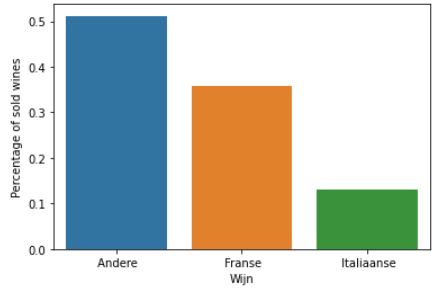

<Axes: xlabel='Wijn', ylabel='Geen'>

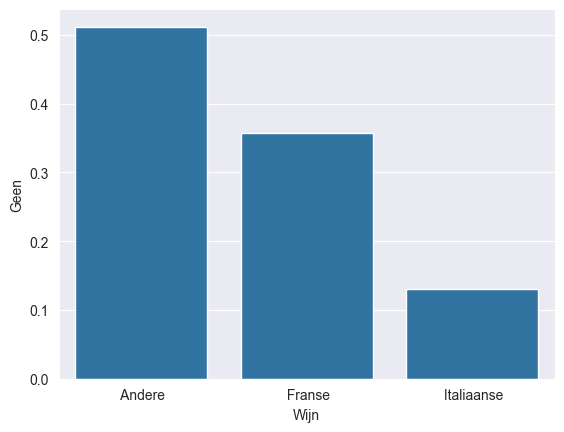

In [32]:
sns.barplot(x=observed.loc["Geen"].index, y=observed.loc["Geen"] / np.sum(observed.loc["Geen"]))

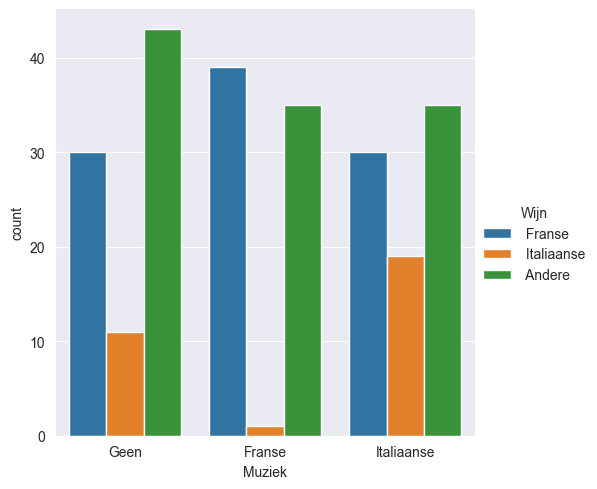

In [25]:
sns.catplot(data=df, x='Muziek', hue='Wijn', kind='count');

Plot a clustered bar chart of the dataset  

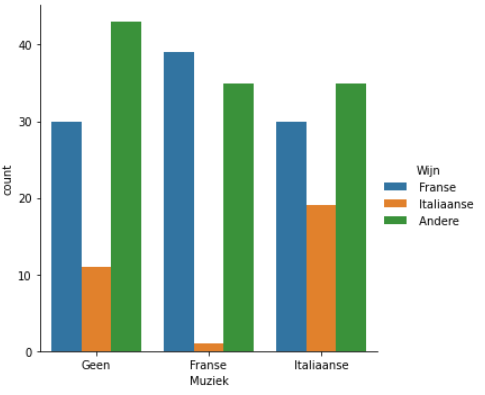

Plot a bar chart (stacked bar chart) of the dataset

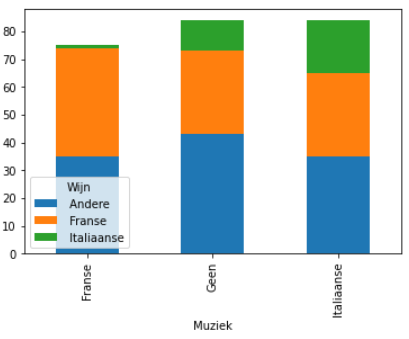

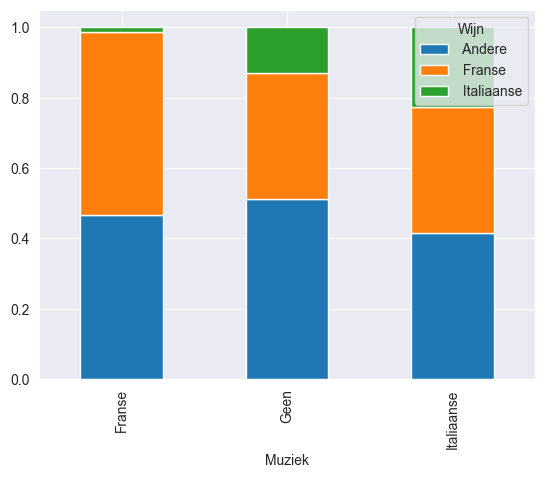

In [38]:
# Contingency table without the margins
observed_p = pd.crosstab(df.Muziek, df.Wijn, normalize='index')

# Horizontally oriented stacked bar chart
observed_p.plot(kind='bar', stacked=True);